In [1]:
# import libraries
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [18]:
# load dataset

df = pd.read_csv('covid_19_clean_complete.csv' , parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16055 entries, 0 to 16054
Data columns (total 8 columns):
Province/State    4875 non-null object
Country/Region    16055 non-null object
Lat               16055 non-null float64
Long              16055 non-null float64
Date              16055 non-null datetime64[ns]
Confirmed         16055 non-null int64
Deaths            16055 non-null int64
Recovered         16055 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1003.6+ KB


In [20]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,16055.000000,16055.000000,16055.000000,16055.000000,16055.000000
mean,22.364044,24.248533,435.497789,16.352102,144.815322
std,24.566311,71.360898,4139.044316,214.426702,2142.533470
min,-41.454500,-135.000000,0.000000,0.000000,0.000000
25%,8.538000,-15.310100,0.000000,0.000000,0.000000
50%,24.974000,21.005900,0.000000,0.000000,0.000000
75%,41.608600,88.092400,20.000000,0.000000,1.000000
max,71.706900,178.065000,83836.000000,8215.000000,61201.000000


In [21]:
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [22]:
# only Provinces state has a missing value. 

In [23]:
# Feature Engineering

# 1. replace missing value
df['Province/State'] = df['Province/State'].fillna('missing')

#2.  Active cases
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']


In [24]:
# current Statistics
temp = df.groupby('Date')['Confirmed' , 'Deaths' , 'Recovered' , 'Active'].sum().reset_index()
temp = temp[temp['Date'] == max(temp['Date'])]
temp['Global Mortality'] = temp['Deaths'] / temp['Confirmed']
temp.style.background_gradient(cmap='RdYlGn')

,Date,Confirmed,Deaths,Recovered,Active,Global Mortality
64,2020-03-26 00:00:00,529591,23970,121966,383655,0.0452613


In [25]:
temp1 = temp.melt(id_vars='Date' , value_vars=['Confirmed' , 'Deaths' , 'Recovered'])
fig = px.treemap(data_frame=temp1 , names=['Confirmed' , 'Deaths' , 'Recovered'] , path=["variable"], values="value", height=500, width=700)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [10]:
# Globaly
data = df.groupby('Country/Region')['Confirmed','Active' , 'Recovered' , 'Deaths'].sum().reset_index()
data.sort_values('Confirmed' , ascending=False , inplace = True)
data.style.background_gradient(cmap = 'Blues' , subset = ['Confirmed' , 'Active']).background_gradient(cmap = 'Greens' , subset = ['Recovered']).background_gradient(cmap = 'Reds' , subset = ['Deaths'])

,Country/Region,Confirmed,Active,Recovered,Deaths
33,China,3777808,1640084,2008446,129278
81,Italy,726899,585322,79003,62574
163,US,372968,365151,2544,5273
148,Spain,339754,288734,30544,20476
77,Iran,335415,205310,108924,21181
62,Germany,279404,263965,14291,1148
147,South Korea,209242,178046,29262,1934
58,France,200600,175860,16878,7862
153,Switzerland,80777,79032,766,979
167,United Kingdom,65970,61827,1238,2905


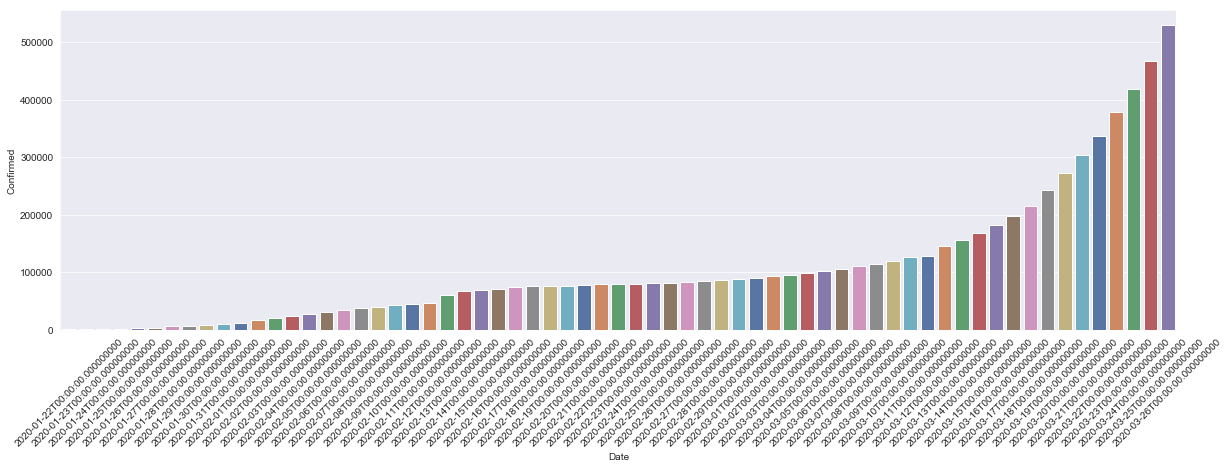

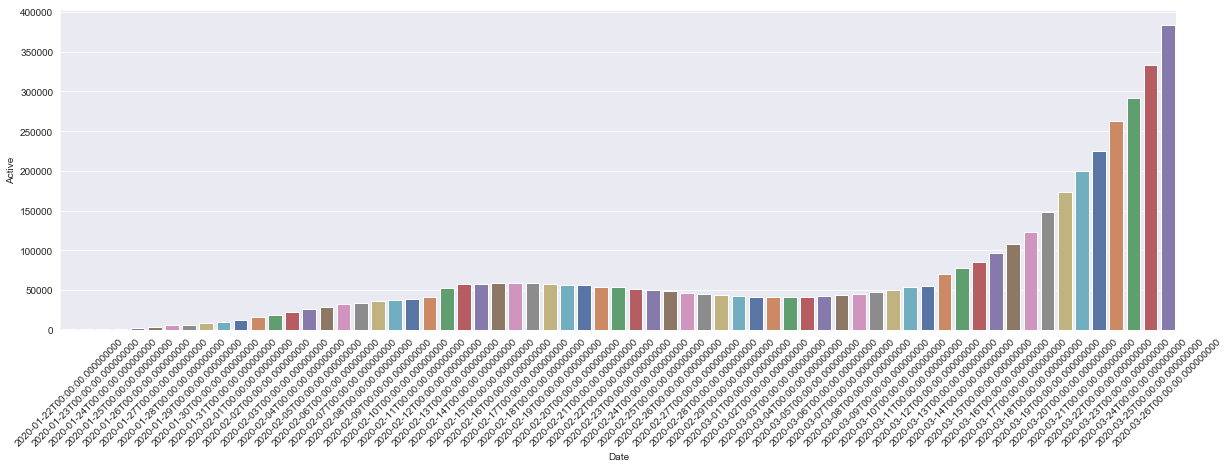

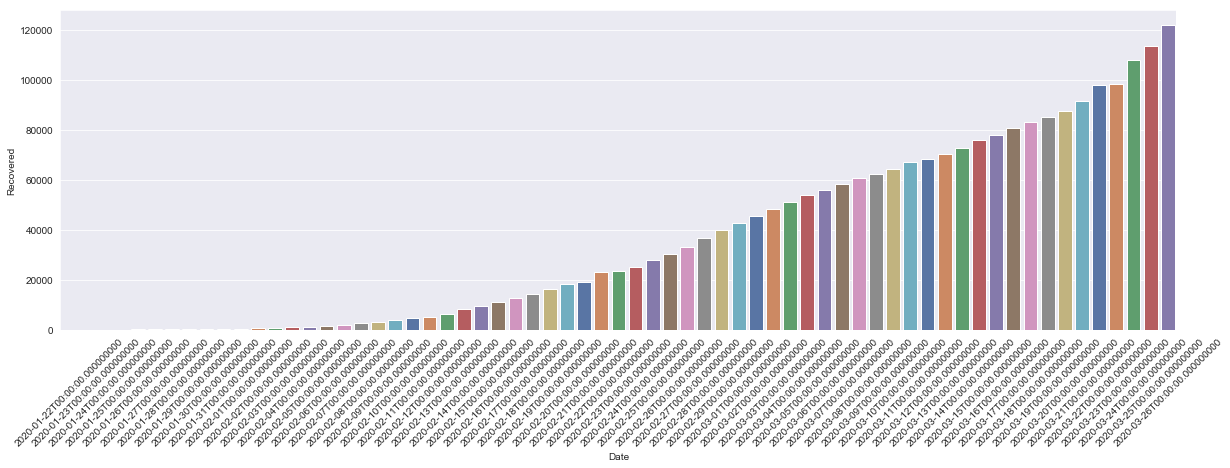

In [26]:
sns.set_style('darkgrid')
data = df.groupby('Date')['Recovered' , 'Confirmed' , 'Active' , 'Deaths'].sum().reset_index()
data
cases = ['Confirmed' , 'Active' , 'Recovered' , 'Deaths']
plotnumber = 1
for i in cases:
    if plotnumber < 4:
        plt.figure(figsize=(20,20))
        ax = plt.subplot(3,1,plotnumber)
        sns.barplot(data = data , x = 'Date' , y = i , palette='deep')
        plt.xticks(rotation=45)
        plt.show()
    plotnumber = plotnumber + 1

AttributeError: 'FacetGrid' object has no attribute 'text'

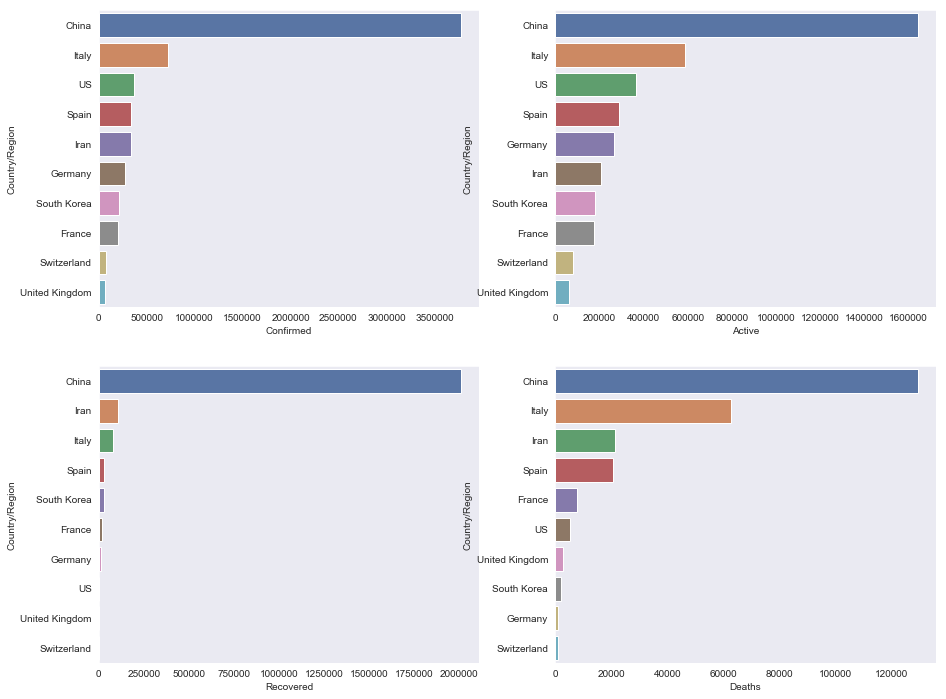

In [131]:
# top 10 Countries based of categories
sns.set_style('dark')
data = df.groupby('Country/Region')['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
data
cases = ['Confirmed','Active','Recovered','Deaths']

plt.figure(figsize=(15,12))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
#cornfirmed

data = data.sort_values('Confirmed', ascending=False).head(10)
sns.barplot(data = data , x = 'Confirmed' , y = 'Country/Region' , palette='deep' , ax = ax1)

#Active
#plt.figure(figsize=(20,20))
data = data.sort_values('Active', ascending=False).head(10)
sns.barplot(data = data , x = 'Active' , y = 'Country/Region' , palette='deep' , ax = ax2)

data = data.sort_values('Recovered', ascending=False).head(10)
sns.barplot(data = data , x = 'Recovered' , y = 'Country/Region' , palette='deep' , ax = ax3)

data = data.sort_values('Deaths', ascending=False).head(10)
sns.barplot(data = data , x = 'Deaths' , y = 'Country/Region' , palette='deep' , ax = ax4)

for index , row in data.iterrows():
    g.text(row.Active, round(row.Active,2), color='black', ha="center")

In [37]:
data.sort_values('Confirmed' , ascending=False).head(20)

,Country/Region,Confirmed,Active,Recovered,Deaths
33,China,3777808,1640084,2008446,129278
81,Italy,726899,585322,79003,62574
163,US,372968,365151,2544,5273
148,Spain,339754,288734,30544,20476
77,Iran,335415,205310,108924,21181
62,Germany,279404,263965,14291,1148
147,South Korea,209242,178046,29262,1934
58,France,200600,175860,16878,7862
153,Switzerland,80777,79032,766,979
167,United Kingdom,65970,61827,1238,2905
